In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
os.chdir('C:\\RESEARCH\\LUSC\\Site')

In [3]:
X=pd.read_excel('Flux_Clinical_Site.xlsx',index_col=0)


In [4]:
X.shape

(501, 2377)

In [5]:
x=X.iloc[:,0:2375].values
y=X.iloc[:,-1].values

In [6]:
y

array(['L-Upper', 'L-Upper', 'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper',
       'L-Lower', 'R-Lower', 'R-Upper', 'L-Upper', 'R-Upper', 'L-Lower',
       'R-Lower', 'L-Lower', 'R-Lower', 'L-Lower', 'L-Upper', 'R-Lower',
       'L-Upper', 'R-Upper', 'L-Upper', 'L-Lower', 'L-Lower', 'R-Upper',
       'R-Lower', 'L-Upper', 'L-Lower', 'L-Lower', 'L-Lower', 'L-Upper',
       'L-Lower', 'L-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Lower',
       'L-Lower', 'L-Upper', 'R-Lower', 'R-Middle', 'R-Upper', 'R-Upper',
       'R-Lower', 'R-Upper', 'L-Upper', 'R-Lower', 'R-Lower', 'L-Upper',
       'L-Lower', 'L-Upper', 'L-Upper', 'R-Upper', 'L-Upper', 'R-Upper',
       'R-Lower', 'R-Upper', 'L-Upper', 'L-Lower', 'R-Lower', 'L-Upper',
       'L-Upper', 'R-Lower', 'R-Lower', 'L-Lower', 'L-Upper', 'L-Lower',
       'L-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'L-Lower', 'L-Upper',
       'R-Lower', 'R-Lower', 'L-Upper', 'L-Upper', 'R-Upper', 'R-Upper',
       'L-Lower', 'L-Lower', 'L-Lower', 'R-Middle'

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [8]:
y

array([2, 2, 4, 2, 4, 6, 1, 4, 6, 2, 6, 1, 4, 1, 4, 1, 2, 4, 2, 6, 2, 1,
       1, 6, 4, 2, 1, 1, 1, 2, 1, 2, 6, 6, 2, 4, 1, 2, 4, 5, 6, 6, 4, 6,
       2, 4, 4, 2, 1, 2, 2, 6, 2, 6, 4, 6, 2, 1, 4, 2, 2, 4, 4, 1, 2, 1,
       2, 6, 6, 2, 1, 2, 4, 4, 2, 2, 6, 6, 1, 1, 1, 5, 4, 6, 2, 6, 4, 6,
       2, 4, 1, 4, 6, 0, 4, 2, 6, 2, 2, 2, 2, 2, 4, 4, 1, 2, 4, 4, 2, 4,
       4, 2, 2, 6, 5, 6, 1, 4, 4, 6, 6, 2, 2, 5, 4, 4, 6, 2, 6, 0, 4, 6,
       1, 1, 2, 6, 4, 2, 1, 6, 2, 2, 2, 6, 1, 6, 6, 1, 4, 4, 2, 2, 4, 4,
       6, 6, 1, 2, 6, 2, 6, 2, 5, 6, 4, 1, 2, 6, 4, 4, 6, 6, 6, 6, 4, 6,
       6, 1, 2, 4, 6, 6, 6, 6, 4, 6, 4, 2, 1, 4, 6, 6, 6, 6, 4, 2, 6, 6,
       6, 4, 2, 4, 4, 2, 4, 6, 4, 4, 2, 6, 1, 2, 2, 4, 2, 4, 4, 2, 4, 2,
       6, 4, 2, 4, 0, 2, 4, 6, 4, 6, 1, 4, 2, 2, 5, 4, 4, 6, 6, 2, 1, 2,
       2, 4, 2, 4, 6, 2, 2, 6, 4, 6, 6, 5, 0, 2, 5, 2, 4, 6, 6, 2, 2, 1,
       1, 2, 1, 1, 0, 3, 4, 0, 6, 4, 2, 2, 6, 4, 4, 6, 1, 1, 1, 5, 6, 4,
       1, 6, 6, 2, 2, 2, 1, 2, 1, 2, 4, 1, 2, 4, 6,

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [11]:

from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
classifier = AdaBoostClassifier(algorithm='SAMME', n_estimators=50, learning_rate=1.0, random_state=0).fit(X_train, y_train)

In [12]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [13]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]) / cm.sum())
print(accuracy)

0.4125


Confusion Matrix, without normalization
[[ 0  0  0  0  2  0  0]
 [ 0  1  0  0 12  0  1]
 [ 0  0  9  0  0  0 15]
 [ 0  0  2  0  2  0  0]
 [ 0  2  0  0 11  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  8  0  2  0 12]]


<Figure size 720x504 with 0 Axes>

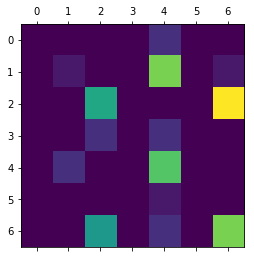

In [14]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.07142857 0.         0.         0.85714286 0.
  0.07142857]
 [0.         0.         0.375      0.         0.         0.
  0.625     ]
 [0.         0.         0.5        0.         0.5        0.
  0.        ]
 [0.         0.15384615 0.         0.         0.84615385 0.
  0.        ]
 [0.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.         0.36363636 0.         0.09090909 0.
  0.54545455]]


<Figure size 432x288 with 0 Axes>

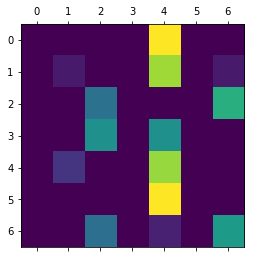

In [15]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [16]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.07      0.12        14
           2       0.47      0.38      0.42        24
           3       0.00      0.00      0.00         4
           4       0.37      0.85      0.51        13
           5       0.00      0.00      0.00         1
           6       0.43      0.55      0.48        22

   micro avg       0.41      0.41      0.41        80
   macro avg       0.23      0.26      0.22        80
weighted avg       0.38      0.41      0.36        80



C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.2448248343082582

In [18]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.4286105952307778

In [ ]:
# Implementation Of Grid Search

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameter_grid = {"n_estimators": [50, 60],
                  "learning_rate":[1.0],
                  "algorithm": ["SAMME", "SAMME.R"],
                  "random_state": [0]}

DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = None, max_depth = None)


clf = AdaBoostClassifier(base_estimator = DTC)             

#cross_validation = StratifiedKFold(y_train, n_splits=10)

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv = 10, scoring = 'roc_auc')

grid_search.fit(X_train, y_train)


Best_Score = grid_search.best_score_
Best_Param = grid_search.best_params_

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Gradient Boosting  Classification to the Testing set
clf = AdaBoostClassifier(algorithm='SAMME', n_estimators=200, learning_rate=1.0, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

# Predicting the Validation set results
y_pred = clf.predict(X_test)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
